In [1]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('/home/sysadm/Downloads/Jan_2019_ontime.csv')
df

df1 = df[["ORIGIN_AIRPORT_ID","DEST_AIRPORT_ID","ORIGIN","DEST","DISTANCE"]]

# Write the updated DataFrame back to a CSV file
df1.isnull().sum()
df1.to_csv('/home/sysadm/Downloads/Jan_2019_ontime_fivecol_final1.csv', index=False)

In [2]:
import pandas as pd
import networkx as nx

def csv_to_graphml(csv_file, graphml_file):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)
    
    # Create an empty directed graph
    graph = nx.DiGraph()
    
    # Iterate over each row in the DataFrame
    for _, row in df.iterrows():
        source_node = int(row['ORIGIN_AIRPORT_ID'])  # Assuming 'ORIGIN_AIRPORT_ID' column contains the source nodes
        target_node = int(row['DEST_AIRPORT_ID'])  # Assuming 'DEST_AIRPORT_ID' column contains the target nodes
        
        # Add edges to the graph
        graph.add_edge(source_node, target_node)
        
        # Add nodes to the graph with attributes
        graph.add_node(source_node, **row)
        graph.add_node(target_node, **row)
    
    # Write the graph to a GraphML file
    nx.write_graphml(graph, graphml_file)
    # Count the number of edges in the graph
    num_edges = len(graph.edges())

    return num_edges

# Example usage
csv_file_path = "/home/sysadm/Downloads/Jan_2019_ontime_fivecol_final1.csv"
graphml_file_path = '/home/sysadm/Downloads/Jan_2019_ontime_fivecol_final2.graphml'
num_edges = csv_to_graphml(csv_file_path, graphml_file_path)
print("Number of edges in the graph:", num_edges)

Number of edges in the graph: 5535


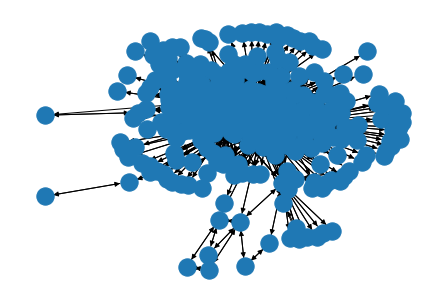

In [3]:
import networkx as nx
G = nx.read_graphml('/home/sysadm/Downloads/Jan_2019_ontime_fivecol_final2.graphml')
nx.draw(G)

In [4]:
import pandas as pd
import networkx as nx

def create_graph_from_csv(csv_file):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)
    
    # Create an empty directed graph
    graph = nx.DiGraph()
    
    # Iterate over each row in the DataFrame
    for _, row in df.iterrows():
        source_node = int(row['ORIGIN_AIRPORT_ID'])  # Assuming 'ORIGIN_AIRPORT_ID' column contains the source nodes
        target_node = int(row['DEST_AIRPORT_ID'])  # Assuming 'DEST_AIRPORT_ID' column contains the target nodes
        
        # Add edges to the graph
        graph.add_edge(source_node, target_node)
        
        # Add nodes to the graph with attributes
        source_node_props = {k: v for k, v in row.items() if k != 'DEST_AIRPORT_ID'}  # Exclude 'DEST_AIRPORT_ID' from node properties
        target_node_props = {k: v for k, v in row.items() if k != 'ORIGIN_AIRPORT_ID'}  # Exclude 'ORIGIN_AIRPORT_ID' from node properties
        graph.add_node(source_node, **source_node_props)
        graph.add_node(target_node, **target_node_props)
    
    return graph

def save_graph_as_graphml(graph, graphml_file):
    # Write the graph to a GraphML file
    nx.write_graphml(graph, graphml_file)

# Example usage
csv_file_path = "/home/sysadm/Downloads/Jan_2019_ontime_fivecol_final1.csv"
graph = create_graph_from_csv(csv_file_path)
graphml_file_path = '/home/sysadm/Downloads/Jan_2019_ontime_fivecol_final2.graphml'
save_graph_as_graphml(graph, graphml_file_path)
